# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Library untuk Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Mengatur style visualisasi
sns.set(style="whitegrid")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [23]:
# Load dataset
data = "../hotel_bookings_raw/hotel_bookings.csv"
df = pd.read_csv(data)

# Menampilkan informasi dasar dataset
print("Jumlah baris dan kolom:", df.shape)
df.head()

Jumlah baris dan kolom: (119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [25]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


C:\Users\ajusk\AppData\Local\Temp\ipykernel_12948\1600467146.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='is_canceled', data=df, palette='viridis')


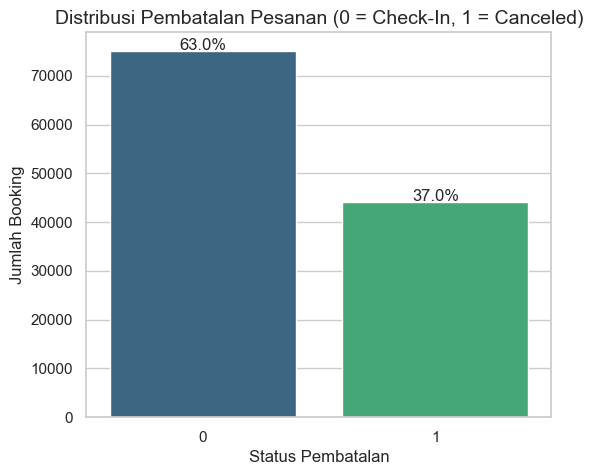

In [26]:
# --- Visualisasi 1: Distribusi Target (is_canceled) ---
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='is_canceled', data=df, palette='viridis')

plt.title('Distribusi Pembatalan Pesanan (0 = Check-In, 1 = Canceled)', fontsize=14)
plt.xlabel('Status Pembatalan')
plt.ylabel('Jumlah Booking')

# Menampilkan persentase di atas batang
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 100
    ax.annotate(percentage, (x, y), size=12)

plt.show()

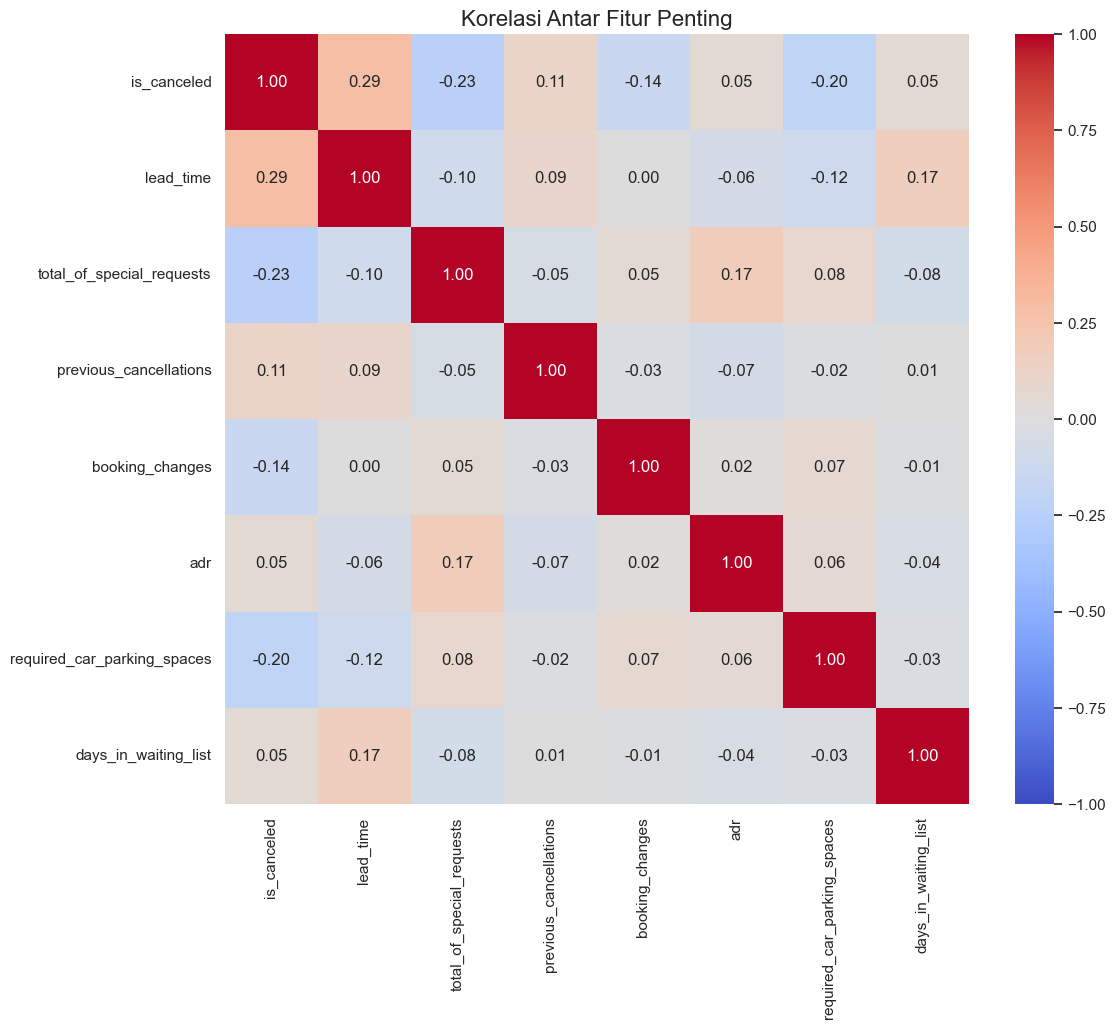

In [27]:
# --- Visualisasi 2: Correlation Matrix ---
plt.figure(figsize=(12, 10))

# Pilih hanya kolom numerik
numeric_cols = ['is_canceled', 'lead_time', 'total_of_special_requests', 
                'previous_cancellations', 'booking_changes', 'adr', 
                'required_car_parking_spaces', 'days_in_waiting_list']

# Hitung korelasi
corr_matrix = df[numeric_cols].corr()

# Gambar Heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi Antar Fitur Penting', fontsize=16)
plt.show()

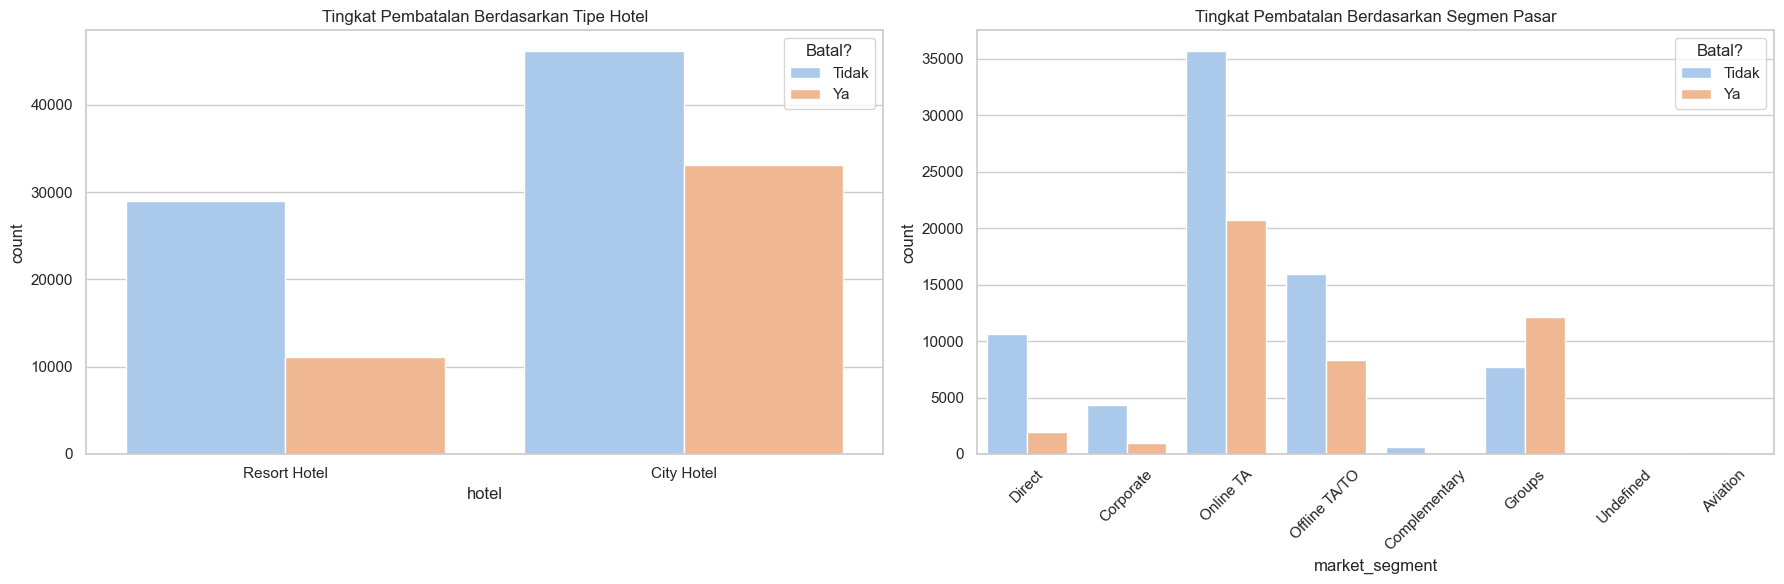

In [28]:
# --- Visualisasi 3: Hubungan Kategori dengan Target ---
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Grafik 1: Tipe Hotel & Pembatalan
sns.countplot(x='hotel', hue='is_canceled', data=df, palette='pastel', ax=axes[0])
axes[0].set_title('Tingkat Pembatalan Berdasarkan Tipe Hotel')
axes[0].legend(title='Batal?', labels=['Tidak', 'Ya'])

# Grafik 2: Market Segment & Pembatalan
sns.countplot(x='market_segment', hue='is_canceled', data=df, palette='pastel', ax=axes[1])
axes[1].set_title('Tingkat Pembatalan Berdasarkan Segmen Pasar')
axes[1].tick_params(axis='x', rotation=45) 
axes[1].legend(title='Batal?', labels=['Tidak', 'Ya'])

plt.tight_layout()
plt.show()

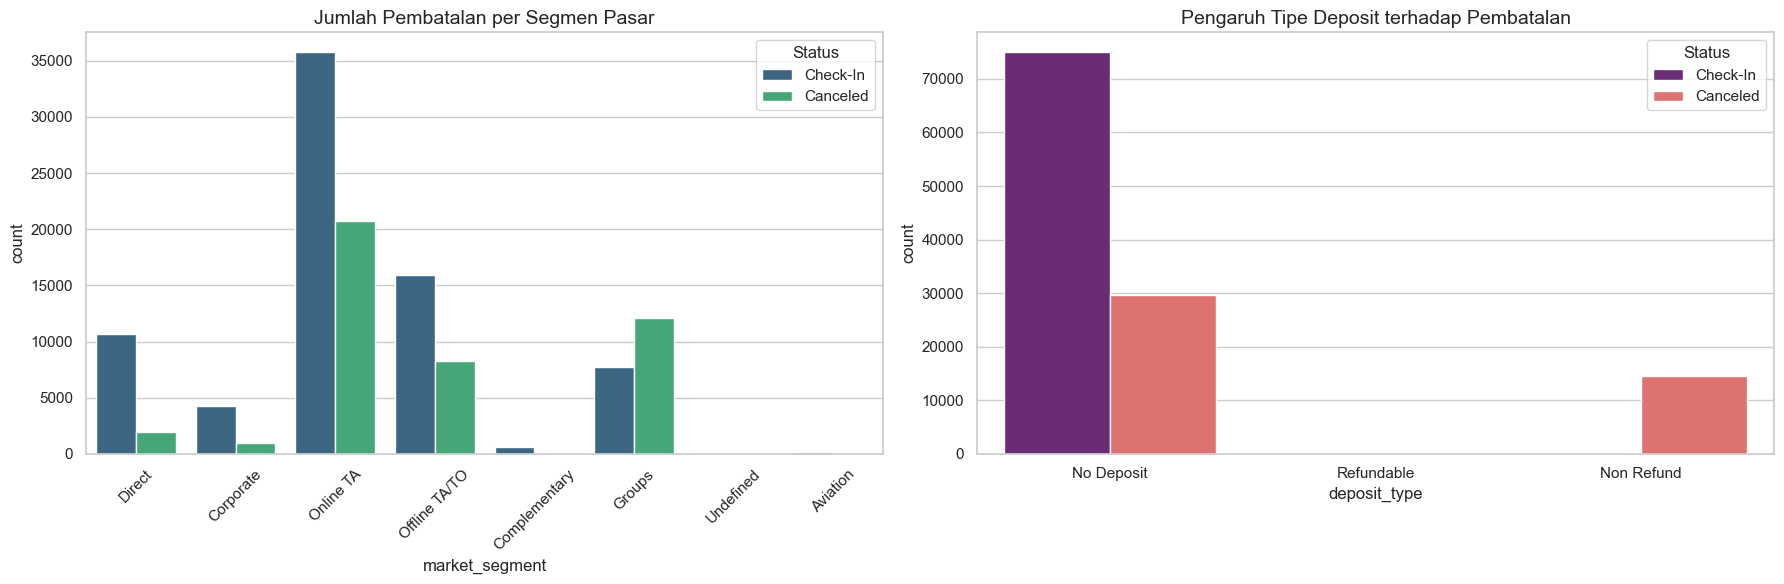

In [29]:
# --- Analisis Kategorikal (Countplot) ---
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 1. Market Segment vs Cancellation
sns.countplot(x='market_segment', hue='is_canceled', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Jumlah Pembatalan per Segmen Pasar', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Status', labels=['Check-In', 'Canceled'])

# 2. Deposit Type vs Cancellation
sns.countplot(x='deposit_type', hue='is_canceled', data=df, palette='magma', ax=axes[1])
axes[1].set_title('Pengaruh Tipe Deposit terhadap Pembatalan', fontsize=14)
axes[1].legend(title='Status', labels=['Check-In', 'Canceled'])

plt.tight_layout()
plt.show()

C:\Users\ajusk\AppData\Local\Temp\ipykernel_12948\1048932859.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_canceled', y='lead_time', data=df, palette='coolwarm', ax=axes[0])
C:\Users\ajusk\AppData\Local\Temp\ipykernel_12948\1048932859.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Check-In', 'Canceled'])
C:\Users\ajusk\AppData\Local\Temp\ipykernel_12948\1048932859.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_canceled', y='adr', data=df, palette='coolwarm', ax=axes[1])
C:\Users\ajusk\AppData\Local\Temp\ipykernel_12948\1048932859.py:13: UserWarning: set

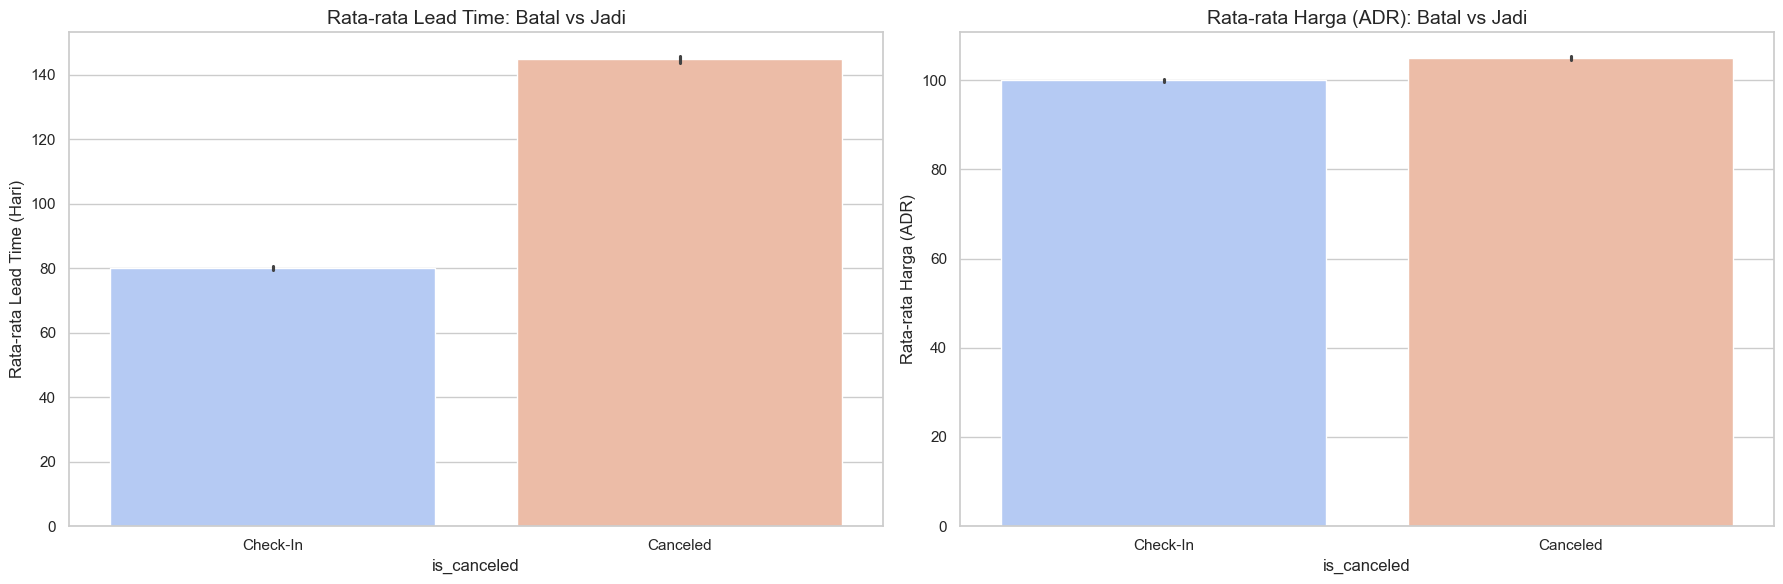

In [30]:
# --- Analisis Numerikal (Barplot Rata-Rata) ---
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 1. Rata-rata Lead Time (Waktu Tunggu) vs Cancel
sns.barplot(x='is_canceled', y='lead_time', data=df, palette='coolwarm', ax=axes[0])
axes[0].set_title('Rata-rata Lead Time: Batal vs Jadi', fontsize=14)
axes[0].set_xticklabels(['Check-In', 'Canceled'])
axes[0].set_ylabel('Rata-rata Lead Time (Hari)')

# 2. Rata-rata ADR (Harga per Malam) vs Cancel
sns.barplot(x='is_canceled', y='adr', data=df, palette='coolwarm', ax=axes[1])
axes[1].set_title('Rata-rata Harga (ADR): Batal vs Jadi', fontsize=14)
axes[1].set_xticklabels(['Check-In', 'Canceled'])
axes[1].set_ylabel('Rata-rata Harga (ADR)')

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [31]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [32]:
# Hapus Duplikat
df_clean = df.drop_duplicates()
print(f"Sisa baris setelah hapus duplikat: {df_clean.shape[0]}")

# 1. Buang kolom 'company'
if 'company' in df_clean.columns:
    df_clean = df_clean.drop(columns=['company'])

# 2. Isi data kosong pada 'agent' dan 'children' dengan 0
df_clean['agent'] = df_clean['agent'].fillna(0)
df_clean['children'] = df_clean['children'].fillna(0)

# 3. Isi 'country' yang kosong dengan 'Unknown'
df_clean['country'] = df_clean['country'].fillna('Unknown')
df_clean = df_clean.dropna()

print(f"Data bersih final: {df_clean.shape}")

Sisa baris setelah hapus duplikat: 87396
Data bersih final: (87396, 31)


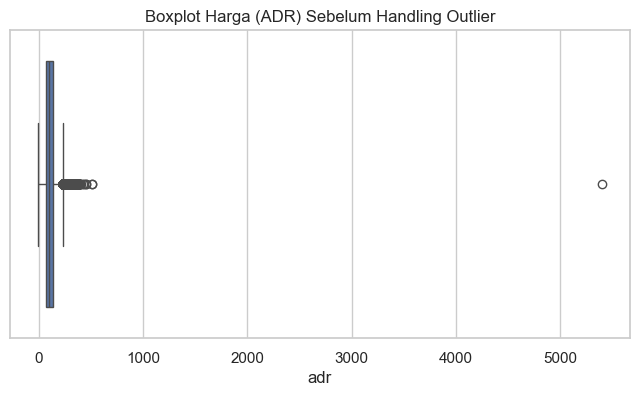

Batas Bawah: -21.00, Batas Atas: 227.00
Data awal: 87396, Data setelah outlier removal: 84906


In [33]:
# --- 1. Handling Outlier (Metode IQR) ---
# Kita fokus pada kolom 'adr' (Harga) karena outlier di sini bisa merusak model.

# Visualisasi Sebelum
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_clean['adr'])
plt.title('Boxplot Harga (ADR) Sebelum Handling Outlier')
plt.show()

# Hitung IQR
Q1 = df_clean['adr'].quantile(0.25)
Q3 = df_clean['adr'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan bawah
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Batas Bawah: {lower_bound:.2f}, Batas Atas: {upper_bound:.2f}")

# Filter data (Buang yang di luar batas)
# Kita gunakan .copy() agar tidak muncul warning
df_filtered = df_clean[(df_clean['adr'] >= lower_bound) & (df_clean['adr'] <= upper_bound)].copy()

print(f"Data awal: {df_clean.shape[0]}, Data setelah outlier removal: {df_filtered.shape[0]}")

In [34]:
# --- 2. Binning (Pengelompokan Data) ---
# Mengelompokkan 'lead_time' menjadi kategori 'Mendadak', 'Normal', 'Jauh Hari'

# Definisikan batas (bins) dan labelnya
bins = [-1, 7, 30, 90, 1000] # -1 sampai 7 hari, 8-30 hari, dst
labels = ['Mendadak', 'Pendek', 'Menengah', 'Jauh Hari']

df_filtered['lead_time_group'] = pd.cut(df_filtered['lead_time'], bins=bins, labels=labels)

# Cek hasilnya
print("Contoh hasil binning lead_time:")
display(df_filtered[['lead_time', 'lead_time_group']].head())

# Drop kolom asli 'lead_time' agar tidak redundan
df_filtered = df_filtered.drop(columns=['lead_time'])

Contoh hasil binning lead_time:


,lead_time,lead_time_group
0,342,Jauh Hari
1,737,Jauh Hari
2,7,Mendadak
3,13,Pendek
4,14,Pendek


In [ ]:
# --- 3. Encoding Data Kategorikal ---
from sklearn.preprocessing import LabelEncoder

# Pilih fitur yang mau dipakai
selected_cols = [
    'lead_time_group', 'arrival_date_year', 'arrival_date_week_number',
    'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
    'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
    'booking_changes', 'agent', 'adr', 'total_of_special_requests',
    'market_segment', 'distribution_channel', 'deposit_type', 'customer_type',
    'is_canceled'
]

df_model = df_filtered[selected_cols].copy()

# Otomatis deteksi kolom kategori
categorical_cols = df_model.select_dtypes(include=['object', 'category']).columns

print(f"Kolom yang akan di-encode: {list(categorical_cols)}")

# Lakukan Label Encoding
le = LabelEncoder()

for col in categorical_cols:
    df_model[col] = le.fit_transform(df_model[col])

print("Data setelah Encoding:")
display(df_model.head())

Kolom yang akan di-encode: ['lead_time_group', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type']
Data setelah Encoding:


,lead_time_group,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,booking_changes,agent,adr,total_of_special_requests,market_segment,distribution_channel,deposit_type,customer_type,is_canceled
0,0,2015,27,0,0,2,0.0,0,0,0,3,0.0,0.0,0,3,1,0,2,0
1,0,2015,27,0,0,2,0.0,0,0,0,4,0.0,0.0,0,3,1,0,2,0
2,1,2015,27,0,1,1,0.0,0,0,0,0,0.0,75.0,0,3,1,0,2,0
3,3,2015,27,0,1,1,0.0,0,0,0,0,304.0,75.0,0,2,0,0,2,0
4,3,2015,27,0,2,2,0.0,0,0,0,0,240.0,98.0,1,6,3,0,2,0


In [37]:
# --- 4. Splitting & Scaling ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split
X = df_model.drop(columns=['is_canceled'])
y = df_model['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Kembalikan ke DataFrame
X_train_final = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_final = pd.DataFrame(X_test_scaled, columns=X.columns)

In [41]:
# --- 5. Simpan Data ---
import os
output_folder = "hotel_bookings_preprocessing"
os.makedirs(output_folder, exist_ok=True)

# Gabungkan Fitur dan Target kembali
train_df = pd.concat([X_train_final, y_train.reset_index(drop=True)], axis=1)
test_df = pd.concat([X_test_final, y_test.reset_index(drop=True)], axis=1)

# Simpan ke CSV
train_df.to_csv(f"{output_folder}/train_processed.csv", index=False)
test_df.to_csv(f"{output_folder}/test_processed.csv", index=False)

print("Done")

Done
